In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [18]:
fake_df = pd.read_csv('Resources/Fake.csv')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
true_df = pd.read_csv('Resources/True.csv')
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [20]:
# Add fake/true column to datasets and concatenate

fake_df['target'] = 'fake'
true_df['target'] = 'true'
combined_df = pd.concat([fake_df,true_df]).reset_index(drop = True)
combined_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [21]:
combined_df.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [22]:
# Shuffle the data
from sklearn.utils import shuffle
combined_df = shuffle(combined_df)
combined_df = combined_df.reset_index(drop=True)
combined_df.head()

,title,text,subject,date,target
0,"Senate Dems To GOP: Take Healthcare Hostage, ...",If you thought Senate Democrats were going to ...,News,"December 7, 2016",fake
1,CONFIRMED: Trump Tried Every Corrupt Trick In...,It appears that Trump tried everything he coul...,News,"May 22, 2017",fake
2,Trump's push to fund wall may be delayed as go...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 24, 2017",true
3,Obama administration completes rule to curb me...,WASHINGTON (Reuters) - The U.S. Interior Depar...,politicsNews,"November 15, 2016",true
4,CATHOLIC PRIEST GOES OFF On Partial-Birth Abor...,Father Gerald Murphy goes off on Hillary Clint...,left-news,"Oct 21, 2016",fake


In [23]:
# Removing the title & date
combined_df.drop(['title','date'], axis=1, inplace = True)
combined_df.head()

,text,subject,target
0,If you thought Senate Democrats were going to ...,News,fake
1,It appears that Trump tried everything he coul...,News,fake
2,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true
3,WASHINGTON (Reuters) - The U.S. Interior Depar...,politicsNews,true
4,Father Gerald Murphy goes off on Hillary Clint...,left-news,fake


In [24]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

combined_df['text'] = combined_df['text'].apply(punctuation_removal)
combined_df.head()

,text,subject,target
0,If you thought Senate Democrats were going to ...,News,fake
1,It appears that Trump tried everything he coul...,News,fake
2,WASHINGTON Reuters US President Donald Trump ...,politicsNews,true
3,WASHINGTON Reuters The US Interior Department...,politicsNews,true
4,Father Gerald Murphy goes off on Hillary Clint...,left-news,fake


In [25]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

combined_df['text'] = combined_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tcurlster/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
combined_df.head()

,text,subject,target
0,If thought Senate Democrats going capitulate w...,News,fake
1,It appears Trump tried everything could think ...,News,fake
2,WASHINGTON Reuters US President Donald Trump i...,politicsNews,true
3,WASHINGTON Reuters The US Interior Department ...,politicsNews,true
4,Father Gerald Murphy goes Hillary Clinton foll...,left-news,fake


In [27]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(combined_df['text'], combined_df.target, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape

((35918,), (8980,))

In [29]:
# Naive Bayes
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 94.15%


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.95      0.94      0.94      4647
        true       0.94      0.94      0.94      4333

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [31]:
# Logistic Regression - Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 98.85%


In [32]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4647
        true       0.99      0.99      0.99      4333

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 99.59%


In [34]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4647
        true       1.00      0.99      1.00      4333

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 98.54%


In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.98      0.99      0.99      4647
        true       0.99      0.98      0.98      4333

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



([<matplotlib.axis.YTick at 0x128bba990>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

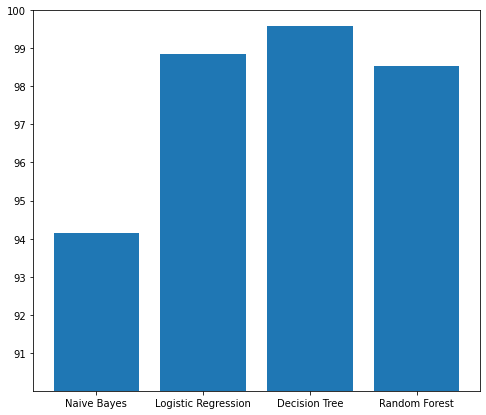

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


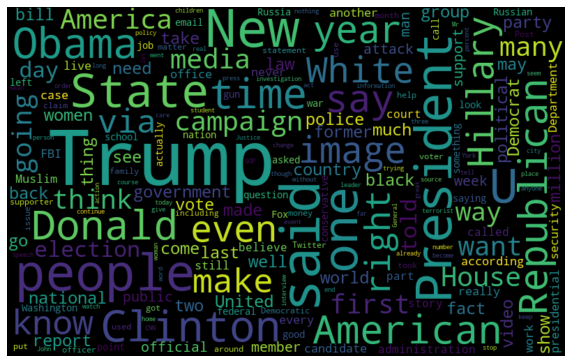

In [39]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = combined_df[combined_df["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

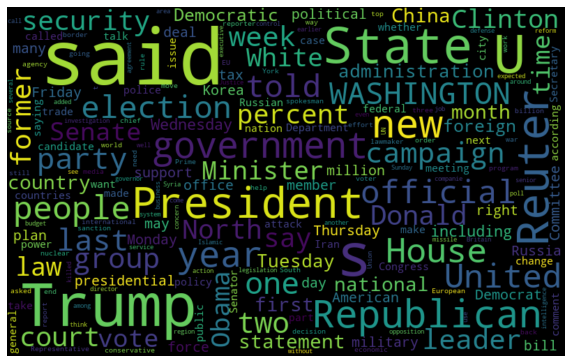

In [40]:
# Word cloud for true news
from wordcloud import WordCloud

fake_data = combined_df[combined_df["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()